### QUESTION 2 Section B (Scratch Implementation)
Implement Logistic Regression in the given dataset. You need to implement Gradient
Descent from scratch, meaning you cannot use any libraries for training the model (You
may use libraries like NumPy for other purposes, but not for training the model). Split

the dataset into 70:15:15 (train: test: validation). The loss function to be used is Cross-
entropy loss.

Dataset: Heart Disease

In [95]:
# !pip install imbalanced-learn

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc
from sklearn.pipeline import make_pipeline
data = pd.read_csv("Heart Disease.csv")
data.head()
data.describe()
# data.shape
data.info()
# data.dtypes
# data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  HeartDisease     4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [97]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
HeartDisease         0
dtype: int64

In [98]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [99]:
data.columns
data['HeartDisease'].value_counts()

HeartDisease
0    3594
1     644
Name: count, dtype: int64

Training set size: (2966, 15)
Validation set size: (636, 15)
Test set size: (636, 15)


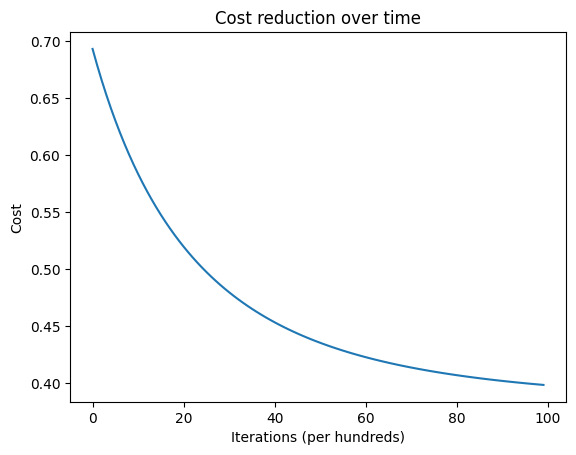

In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters W (weights) and b (bias)
def initialize_parameters(n_features):
    W = np.zeros((n_features, 1))
    b = 0
    return W, b

# Compute cost and gradients for logistic regression
def compute_cost_and_gradient(X, y, W, b):
    m = X.shape[0]  # Number of samples
    A = sigmoid(np.dot(X, W) + b)  # Prediction using sigmoid
    cost = -(1/m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))  # Binary cross-entropy
    dW = (1/m) * np.dot(X.T, (A - y))  # Gradient w.r.t. weights
    db = (1/m) * np.sum(A - y)  # Gradient w.r.t. bias
    return cost, dW, db

# Train the model using gradient descent
#  there will be some change
def train(X_train, y_train, X_val, y_val, learning_rate, num_iterations):
    n_features = X_train.shape[1]
    W, b = initialize_parameters(n_features)
    costs = []
    
    y_train = y_train.reshape(-1, 1)
    
    for i in range(num_iterations):
        cost, dW, db = compute_cost_and_gradient(X_train, y_train, W, b)
        W -= learning_rate * dW  # Update weights
        b -= learning_rate * db  # Update bias
        
        if i % 100 == 0:  # Save cost every 100 iterations
            costs.append(cost)
    
    return W, b, costs

# Plot the cost over iterations
def plot_costs(costs):
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title('Cost reduction over time')
    plt.show()

# Load dataset
# df = pd.read_csv('Heart Disease.csv')  # Replace with your actual file
df = data
# Handle missing values (fill or drop missing values)
df.fillna(df.mean(), inplace=True)  # Fill NA with column mean

# Handle missing values if any (for simplicity, we'll drop them)
# data = data.dropna()

# Split data into features and labels
X = df.drop(columns=['HeartDisease'])  # Drop the target column
y = df['HeartDisease'].values  # Target column as numpy array

# Split into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
# Then split temp into validation and test (each 15% of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model
# learning_rate = 0.01
# num_iterations = 2000
learning_rate = 0.001
num_iterations = 10000
W, b, costs = train(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, num_iterations)

# Plot the costs
plot_costs(costs)


In [101]:
# import pandas as pd
# import numpy as np

# # Load your data
# data = pd.read_csv('Heart Disease.csv')

# # Drop rows with missing values
# data = data.dropna()

# # Define independent variables (features) and dependent variable (target)
# X_data = data.drop('HeartDisease', axis=1).values
# y_data = data['HeartDisease'].values
# # Mean and standard deviation for scaling
# means = np.mean(X_data, axis=0)
# stds = np.std(X_data, axis=0)

# # Standardize features
# X_data_scaled = (X_data - means) / stds
# # Split data into training and test sets
# np.random.seed(42)
# indices = np.arange(X_data_scaled.shape[0])
# np.random.shuffle(indices)

# split = int(0.7 * X_data_scaled.shape[0])
# train_indices = indices[:split]
# test_indices = indices[split:]

# X_train = X_data_scaled[train_indices]
# y_train = y_data[train_indices]
# X_test = X_data_scaled[test_indices]
# y_test = y_data[test_indices]
# class LogisticRegression:
#     def __init__(self, learning_rate=0.01, num_iterations=1000):
#         self.learning_rate = learning_rate
#         self.num_iterations = num_iterations
    
#     def sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))
    
#     def fit(self, X, y):
#         m, n = X.shape
#         self.weights = np.zeros(n)
#         self.bias = 0
        
#         for _ in range(self.num_iterations):
#             model = np.dot(X, self.weights) + self.bias
#             predictions = self.sigmoid(model)
            
#             # Compute gradients
#             dw = (1 / m) * np.dot(X.T, (predictions - y))
#             db = (1 / m) * np.sum(predictions - y)
            
#             # Update parameters
#             self.weights -= self.learning_rate * dw
#             self.bias -= self.learning_rate * db
    
#     def predict(self, X):
#         model = np.dot(X, self.weights) + self.bias
#         predictions = self.sigmoid(model)
#         return np.round(predictions)

# # Train the model
# model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
# model.fit(X_train, y_train)

# # Predict with the model
# y_pred = model.predict(X_test)
# def accuracy(y_true, y_pred):
#     return np.mean(y_true == y_pred)

# def confusion_matrix(y_true, y_pred):
#     tp = np.sum((y_true == 1) & (y_pred == 1))
#     tn = np.sum((y_true == 0) & (y_pred == 0))
#     fp = np.sum((y_true == 0) & (y_pred == 1))
#     fn = np.sum((y_true == 1) & (y_pred == 0))
#     return np.array([[tn, fp], [fn, tp]])

# def classification_report(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     tn, fp, fn, tp = cm.ravel()
    
#     accuracy = (tp + tn) / (tp + tn + fp + fn)
#     precision = tp / (tp + fp) if (tp + fp) > 0 else 0
#     recall = tp / (tp + fn) if (tp + fn) > 0 else 0
#     f1_score = 10 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
#     return f"Accuracy: {accuracy:.4f}\n" \
#            f"Precision: {precision:.4f}\n" \
#            f"Recall: {recall:.4f}\n" \
#            f"F1 Score: {f1_score:.4f}\n"

# # Evaluate the model
# accuracy_dt = accuracy(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)

# print("Classification Report:\n", report)
# print("Accuracy of Logistic Regression model: ", accuracy_dt)
# print("Confusion Matrix:\n", cm)


### PART A

In [102]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Load your data
# data = pd.read_csv('Heart Disease.csv')

# # Drop rows with missing values
# data = data.dropna()

# # Define independent variables (features) and dependent variable (target)
# X_data = data.drop('HeartDisease', axis=1).values
# y_data = data['HeartDisease'].values

# # Mean and standard deviation for scaling
# means = np.mean(X_data, axis=0)
# stds = np.std(X_data, axis=0)

# # Standardize features
# X_data_scaled = (X_data - means) / stds

# # Split data into training, validation, and test sets
# np.random.seed(42)
# indices = np.arange(X_data_scaled.shape[0])
# np.random.shuffle(indices)

# split_train = int(0.7 * X_data_scaled.shape[0])
# split_val = int(0.15 * X_data_scaled.shape[0]) + split_train

# train_indices = indices[:split_train]
# val_indices = indices[split_train:split_val]
# test_indices = indices[split_val:]

# X_train = X_data_scaled[train_indices]
# y_train = y_data[train_indices]
# X_val = X_data_scaled[val_indices]
# y_val = y_data[val_indices]
# X_test = X_data_scaled[test_indices]
# y_test = y_data[test_indices]
# # X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
# # X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# class LogisticRegression:
#     def __init__(self, learning_rate=0.001, num_iterations=10000):
#         self.learning_rate = learning_rate
#         self.num_iterations = num_iterations
    
#     def sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))
    
#     def fit(self, X, y, X_val, y_val):
#         m, n = X.shape
#         self.weights = np.zeros(n)
#         self.bias = 0
#         self.losses = []
#         self.train_accuracies = []
#         self.val_accuracies = []
#         self.val_losses = []

#         for i in range(self.num_iterations):
#             model = np.dot(X, self.weights) + self.bias
#             predictions = self.sigmoid(model)

#             # Compute gradients
#             dw = (1 / m) * np.dot(X.T, (predictions - y))
#             db = (1 / m) * np.sum(predictions - y)
            
#             # Update parameters
#             self.weights -= self.learning_rate * dw
#             self.bias -= self.learning_rate * db
            
#             # Calculate loss and accuracy
#             loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
#             self.losses.append(loss)
            
#             train_predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
#             train_accuracy = np.mean(np.round(train_predictions) == y)
#             self.train_accuracies.append(train_accuracy)
            
#             # Validation loss and accuracy
#             val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
#             val_loss = -np.mean(y_val * np.log(val_predictions + 1e-10) + (1 - y_val) * np.log(1 - val_predictions + 1e-10))
#             val_accuracy = np.mean(np.round(val_predictions) == y_val)
#             self.val_losses.append(val_loss)
#             self.val_accuracies.append(val_accuracy)
    
#     def predict(self, X):
#         model = np.dot(X, self.weights) + self.bias
#         predictions = self.sigmoid(model)
#         return np.round(predictions)

# # Train the model
# model = LogisticRegression(learning_rate=0.001, num_iterations=10000)
# model.fit(X_train, y_train, X_val, y_val)

# # Predict with the model
# y_pred = model.predict(X_test)

# def accuracy(y_true, y_pred):
#     return np.mean(y_true == y_pred)

# def confusion_matrix(y_true, y_pred):
#     tp = np.sum((y_true == 1) & (y_pred == 1))
#     tn = np.sum((y_true == 0) & (y_pred == 0))
#     fp = np.sum((y_true == 0) & (y_pred == 1))
#     fn = np.sum((y_true == 1) & (y_pred == 0))
#     # print(tp,tn,fp,fn)
#     return np.array([[tn, fp], [fn, tp]])

# def classification_report(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     # print(cm)
#     # tn, fp, fn, tp = cm.ravel()
#     tp, fn, fp, tn = cm.ravel()
#     # print(tn,fp,fn,tp)
    
#     accuracy = (tp + tn) / (tp + tn + fp + fn)
#     precision = tp / (tp + fp) if (tp + fp) > 0 else 0
#     recall = tp / (tp + fn) if (tp + fn) > 0 else 0
#     f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
#     return f"Accuracy: {accuracy:.4f}\n" \
#            f"Precision: {precision:.4f}\n" \
#            f"Recall: {recall:.4f}\n" \
#            f"F1 Score: {f1_score:.4f}\n"

# # Evaluate the model
# accuracy_dt = accuracy(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)

# # print("Classification Report:\n", report)
# # print("Accuracy of Logistic Regression model: ", accuracy_dt)
# # print("Confusion Matrix:\n", cm)

# # Plotting the results
# plt.figure(figsize=(14, 10))

# # Plot Training Loss vs. Iteration
# plt.subplot(2, 2, 1)
# plt.plot(model.losses, label='Training Loss')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Training Loss vs. Iteration')
# plt.legend()

# # Plot Validation Loss vs. Iteration
# plt.subplot(2, 2, 2)
# plt.plot(model.val_losses, label='Validation Loss', color='red')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Validation Loss vs. Iteration')
# plt.legend()

# # Plot Training Accuracy vs. Iteration
# plt.subplot(2, 2, 3)
# plt.plot(model.train_accuracies, label='Training Accuracy')
# plt.xlabel('Iteration')
# plt.ylabel('Accuracy')
# plt.title('Training Accuracy vs. Iteration')
# plt.legend()

# # Plot Validation Accuracy vs. Iteration
# plt.subplot(2, 2, 4)
# plt.plot(model.val_accuracies, label='Validation Accuracy', color='orange')
# plt.xlabel('Iteration')
# plt.ylabel('Accuracy')
# plt.title('Validation Accuracy vs. Iteration')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Plot Training Loss and Validation Loss vs. Iteration
# plt.figure(figsize=(12, 6))
# plt.plot(model.losses, label='Training Loss')
# plt.plot(model.val_losses, label='Validation Loss', color='red')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss vs. Iteration')
# plt.legend()
# plt.show()
# # Plot Training and Validation Accuracy vs. Iteration
# plt.figure(figsize=(12, 6))
# plt.plot(model.train_accuracies, label='Training Accuracy')
# plt.plot(model.val_accuracies, label='Validation Accuracy', color='orange')
# plt.xlabel('Iteration')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy vs. Iteration')
# plt.legend()
# plt.show()


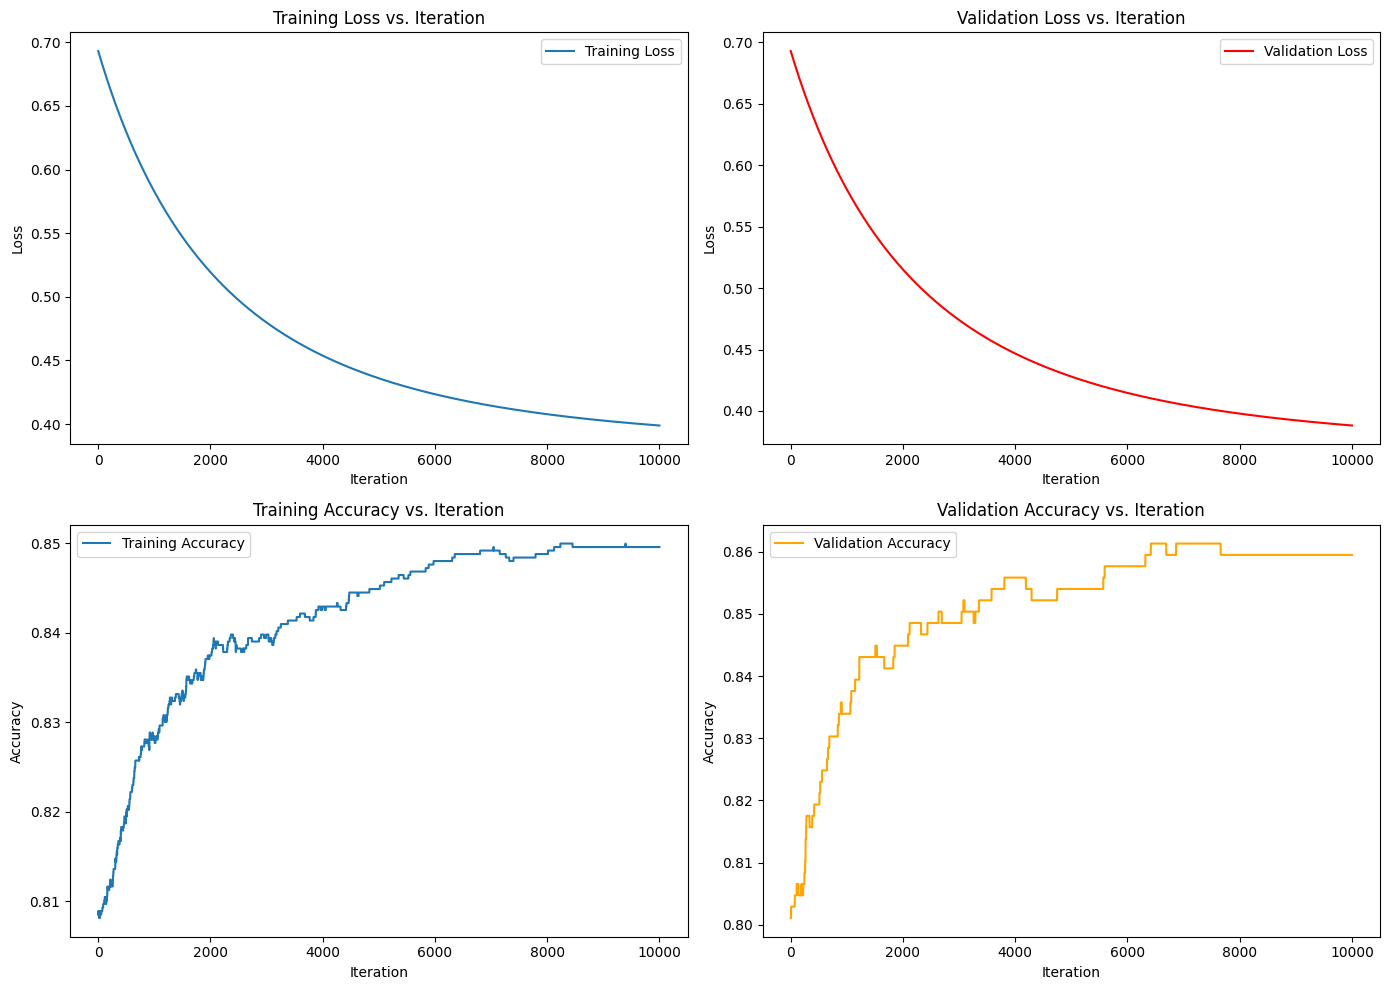

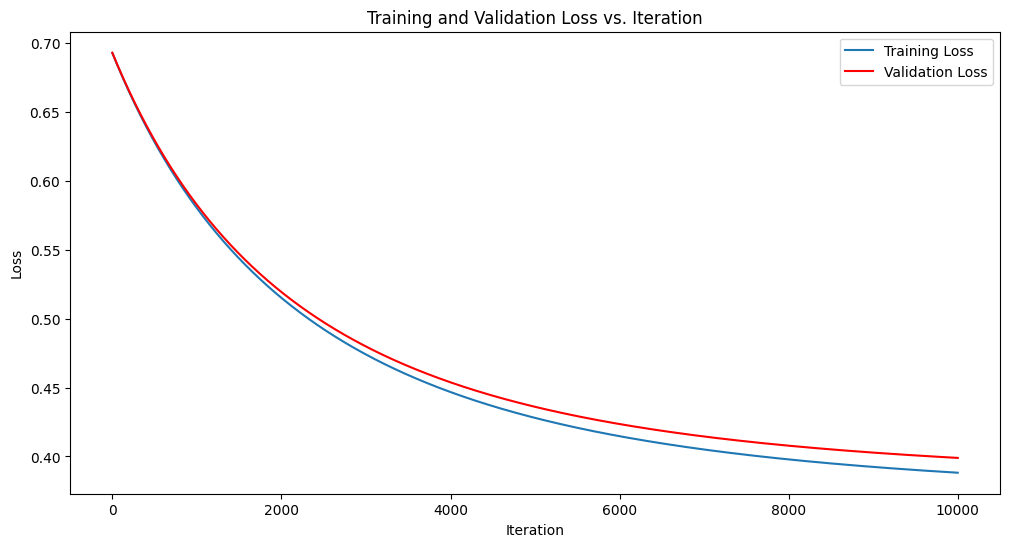

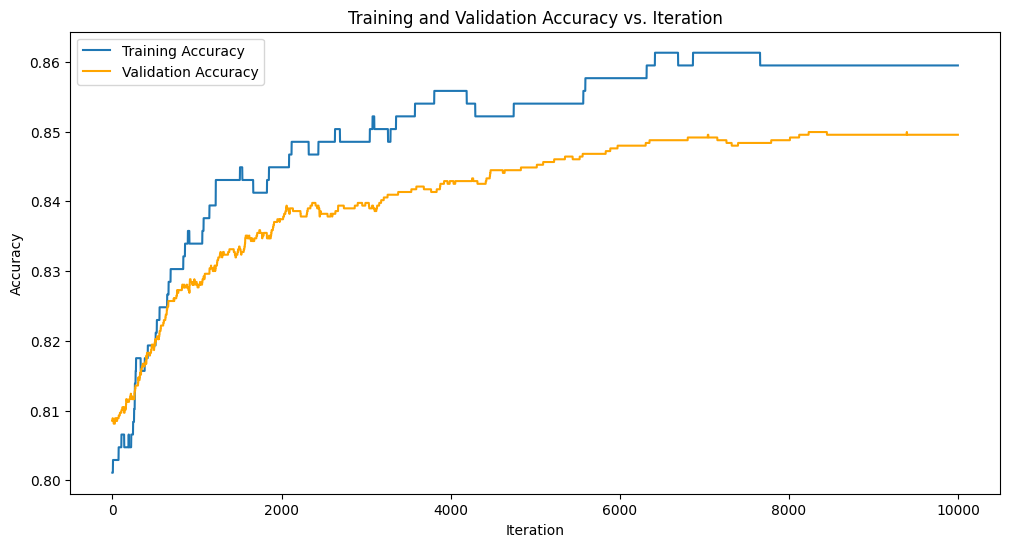

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Mean and standard deviation for scaling
means = np.mean(X_data, axis=0)
stds = np.std(X_data, axis=0)

# Standardize features
X_data_scaled = (X_data - means) / stds

# Split data into training, validation, and test sets
np.random.seed(42)
indices = np.arange(X_data_scaled.shape[0])
np.random.shuffle(indices)

split_train = int(0.7 * X_data_scaled.shape[0])
split_val = int(0.15 * X_data_scaled.shape[0]) + split_train

train_indices = indices[:split_train]
val_indices = indices[split_train:split_val]
test_indices = indices[split_val:]

X_train = X_data_scaled[train_indices]
y_train = y_data[train_indices]
X_val = X_data_scaled[val_indices]
y_val = y_data[val_indices]
X_test = X_data_scaled[test_indices]
y_test = y_data[test_indices]
# X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y, X_val, y_val):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        self.train_accuracies = []
        self.val_accuracies = []
        self.val_losses = []

        for i in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate loss and accuracy
            loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
            self.losses.append(loss)
            
            train_predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
            train_accuracy = np.mean(np.round(train_predictions) == y)
            self.train_accuracies.append(train_accuracy)
            
            # Validation loss and accuracy
            val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
            val_loss = -np.mean(y_val * np.log(val_predictions + 1e-10) + (1 - y_val) * np.log(1 - val_predictions + 1e-10))
            val_accuracy = np.mean(np.round(val_predictions) == y_val)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_accuracy)
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

# Train the model
model = LogisticRegression(learning_rate=0.001, num_iterations=10000)
model.fit(X_train, y_train, X_val, y_val)

# Predict with the model
y_pred = model.predict(X_test)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    # print(tp,tn,fp,fn)
    return np.array([[tn, fp], [fn, tp]])

def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    # print(cm)
    # tn, fp, fn, tp = cm.ravel()
    tp, fn, fp, tn = cm.ravel()
    # print(tn,fp,fn,tp)
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return f"Accuracy: {accuracy:.4f}\n" \
           f"Precision: {precision:.4f}\n" \
           f"Recall: {recall:.4f}\n" \
           f"F1 Score: {f1_score:.4f}\n"

# Evaluate the model
accuracy_dt = accuracy(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print("Classification Report:\n", report)
# print("Accuracy of Logistic Regression model: ", accuracy_dt)
# print("Confusion Matrix:\n", cm)

# Plotting the results
plt.figure(figsize=(14, 10))

# Plot Training Loss vs. Iteration
plt.subplot(2, 2, 1)
plt.plot(model.losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss vs. Iteration')
plt.legend()

# Plot Validation Loss vs. Iteration
plt.subplot(2, 2, 2)
plt.plot(model.val_losses, label='Validation Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Iteration')
plt.legend()

# Plot Training Accuracy vs. Iteration
plt.subplot(2, 2, 3)
plt.plot(model.train_accuracies, label='Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Iteration')
plt.legend()

# Plot Validation Accuracy vs. Iteration
plt.subplot(2, 2, 4)
plt.plot(model.val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Training Loss and Validation Loss vs. Iteration
plt.figure(figsize=(12, 6))
plt.plot(model.val_losses, label='Training Loss')
plt.plot(model.losses, label='Validation Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Iteration')
plt.legend()
plt.show()
# Plot Training and Validation Accuracy vs. Iteration
plt.figure(figsize=(12, 6))
plt.plot(model.val_accuracies, label='Training Accuracy')
plt.plot(model.train_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Iteration')
plt.legend()
plt.show()


1. Convergence of the Model:
Training Loss vs. Iteration:

Initial Decrease: we see a rapid decrease in training loss in the early iterations, indicating that the model is learning from the data.
Over time, the training loss should gradually decrease and eventually plateau. A well-behaved convergence is characterized by a smooth curve that flattens out, indicating that the model is approaching a minimum loss.

Validation Loss vs. Iteration:

Initial Decrease: Similar to training loss, validation loss should initially decrease as the model improves.
Overfitting Indicator: If validation loss starts increasing after a certain point while training loss continues to decrease, it suggests overfitting. This is when the model starts to memorize the training data rather than generalizing well to unseen data.

Training Accuracy vs. Iteration:

Improvement: Training accuracy should generally increase as the training progresses, reflecting better performance on the training set.
Saturation: Eventually, the training accuracy should stabilize, indicating that the model has achieved its best performance on the training data.
Validation Accuracy vs. Iteration:

Initial Improvement: Validation accuracy should initially increase, reflecting improvements in model generalization.
Plateau or Decrease: If validation accuracy plateaus or decreases after some iterations, it may indicate overfitting, where the model's performance on unseen data starts to decline.
2. Comparing and Analyzing the Plots:
Training Loss vs. Validation Loss:

Convergence: If both training and validation losses decrease and stabilize, it indicates good convergence. The difference between the two should be minimal.
Overfitting: A significant gap where validation loss increases while training loss continues to decrease signals overfitting.
Training Accuracy vs. Validation Accuracy:

Consistency: Ideally, both training and validation accuracy should improve and stabilize. A large gap between training and validation accuracy suggests that the model might be overfitting.
Generalization: Consistent improvement in both accuracies indicates that the model generalizes well.

### PART B

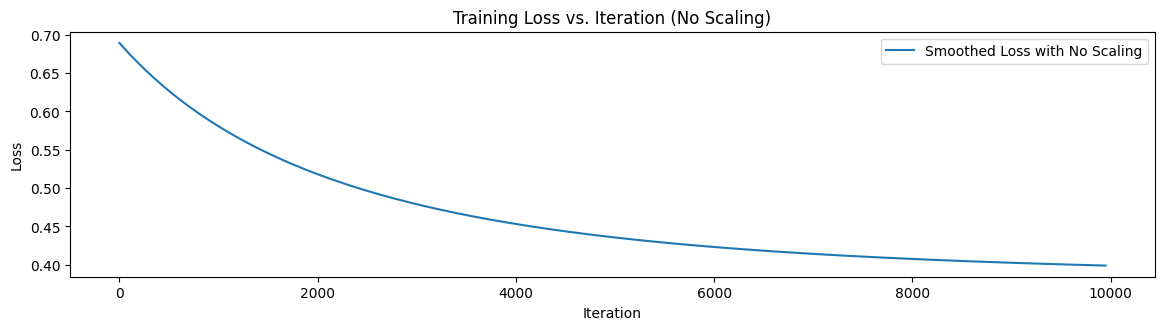

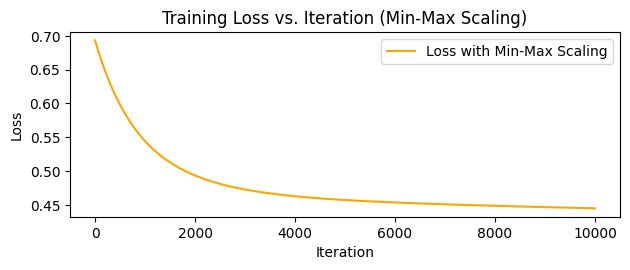

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def smooth_data(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def plot_results(losses_no_scaling, losses_min_max_scaling, window_size=50):
    plt.figure(figsize=(14, 7))
    
    # Smooth the losses_no_scaling data
    smoothed_losses_no_scaling = smooth_data(losses_no_scaling, window_size)
    
    plt.subplot(2, 1, 1)
    plt.plot(smoothed_losses_no_scaling, label='Smoothed Loss with No Scaling')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Loss vs. Iteration (No Scaling)')
    # plt.gca().invert_yaxis()
    plt.legend()
    plt.show()
    
    plt.subplot(2, 1, 2)
    plt.plot(losses_min_max_scaling, label='Loss with Min-Max Scaling', color='orange')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Loss vs. Iteration (Min-Max Scaling)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Logistic Regression with No Scaling
model_no_scaling = LogisticRegression(learning_rate=0.001, num_iterations=10000)
model_no_scaling.fit(X_train, y_train, X_val, y_val)

# Logistic Regression with Min-Max Scaling
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_val_minmax = scaler.transform(X_val)
X_test_minmax = scaler.transform(X_test)

model_minmax_scaling = LogisticRegression(learning_rate=0.001, num_iterations=10000)
model_minmax_scaling.fit(X_train_minmax, y_train, X_val_minmax, y_val)

# Plotting the results
plot_results(model_no_scaling.losses, model_minmax_scaling.losses)


1. Impact of Min-Max Scaling:
Faster Convergence:
    Min-Max scaling normalizes features to a [0, 1] range, which often leads to faster convergence. This is because gradient descent algorithms perform better when features have similar scales.

Consistent Gradient Updates:
    With normalized feature values, gradient updates are more stable and consistent. This can lead to smoother and more reliable convergence paths.
    
Avoiding Dominance of Features:
    Features with different scales can dominate the gradient updates, leading to slower convergence. Scaling ensures that each feature contributes equally to the gradient updates.

2. Impact of No Scaling:
Slower Convergence:
    Without scaling, features with larger ranges can cause slower convergence as the gradient descent may take longer to find the optimal parameters.

Potential Instability:
    Large feature values can lead to large gradients, causing instability in the optimization process.

Gradient Magnitude Discrepancies:
    Features with different scales can lead to uneven gradient magnitudes, affecting the learning rate and convergence speed.


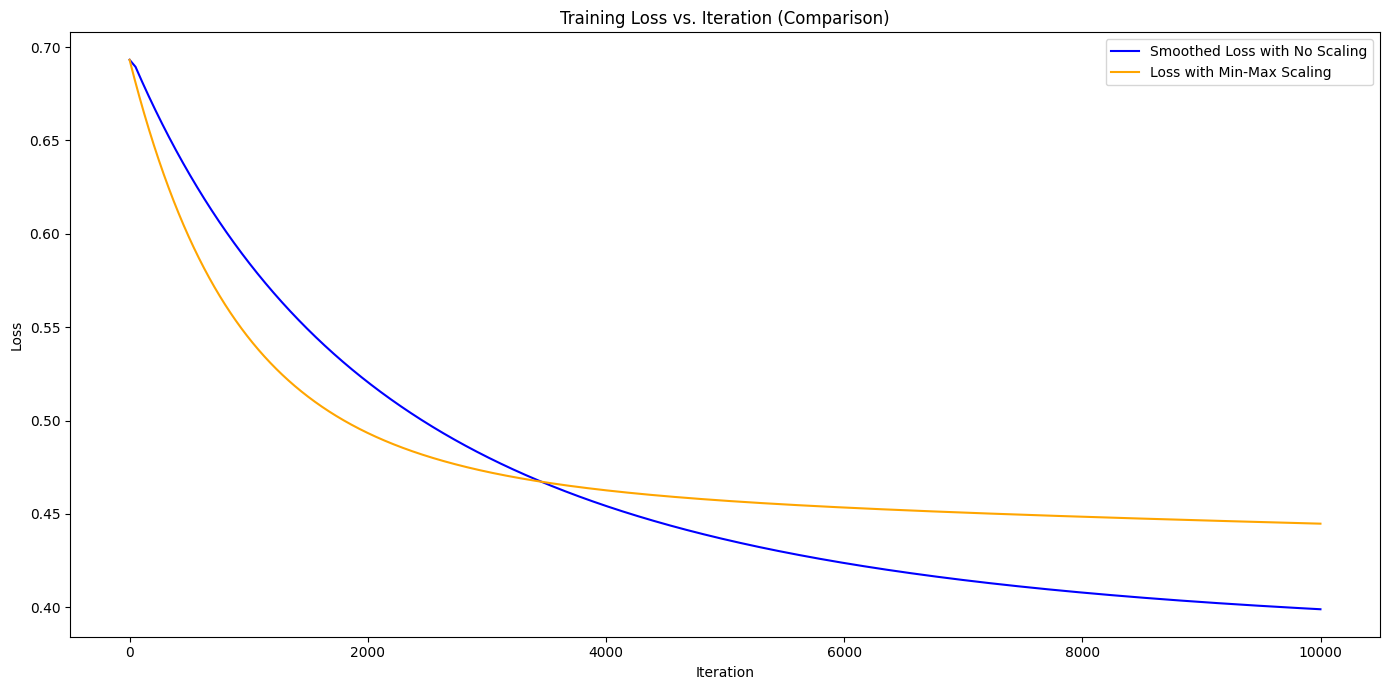

In [105]:
import matplotlib.pyplot as plt

def plot_results(losses_no_scaling, losses_min_max_scaling, window_size=50):
    plt.figure(figsize=(14, 7))
    
    # Smooth the losses_no_scaling data
    smoothed_losses_no_scaling = smooth_data(losses_no_scaling, window_size)
    
    # Plot both sets of losses on the same graph
    plt.plot(smoothed_losses_no_scaling, label='Smoothed Loss with No Scaling', color='blue')
    plt.plot(losses_min_max_scaling, label='Loss with Min-Max Scaling', color='orange')
    
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Loss vs. Iteration (Comparison)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def smooth_data(data, window_size):
    """Smooth the data using a rolling window average."""
    smoothed = []
    for i in range(len(data)):
        window = data[max(0, i - window_size + 1):i + 1]
        smoothed.append(sum(window) / len(window))
    return smoothed
plot_results(model_no_scaling.losses, model_minmax_scaling.losses)


### PART C

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
roc_auc = roc_auc_score(y_val, model.sigmoid(np.dot(X_val, model.weights) + model.bias))
print("Classification Report:\n", report)
print("Accuracy of Logistic Regression model: ", accuracy_dt)
print("Confusion Matrix:\n", cm)
print("ROC-AUC Score: ", roc_auc)
# fpr, tpr, _ = roc_curve(y_val, model.sigmoid(np.dot(X_val, model.weights) + model.bias))
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, marker='.', label='ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=['Negative', 'Positive'], 
#             yticklabels=['Negative', 'Positive'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


Classification Report:
 Accuracy: 0.8634
Precision: 0.8766
Recall: 0.9812
F1 Score: 0.9260

Accuracy of Logistic Regression model:  0.8633879781420765
Confusion Matrix:
 [[469   9]
 [ 66   5]]
ROC-AUC Score:  0.7423241352506802


1. Confusion Matrix:
The confusion matrix is computed to show the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) counts. It helps visualize the performance of the classification model.

2. Classification Metrics:
                Actual Positive   Actual Negative
Predicted Positive    TP              FP
Predicted Negative    FN              TN

Precision: The proportion of true positives among all positive predictions. It shows how many of the predicted positives are actually positive.
Recall: The proportion of true positives among all actual positives. It shows how many of the actual positives were correctly identified.
F1 Score: The harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.
ROC-AUC Score: The Area Under the Receiver Operating Characteristic Curve. It measures the model’s ability to distinguish between positive and negative classes. A higher score indicates better performance.
Insights:
Precision and recall provide insight into the trade-off between correctly identifying positive cases and avoiding false positives.
F1 Score helps evaluate the model’s balance between precision and recall, especially important in cases of imbalanced datasets.
ROC-AUC Score offers a summary of the model’s performance across different thresholds and is useful for comparing different models.


### PART D

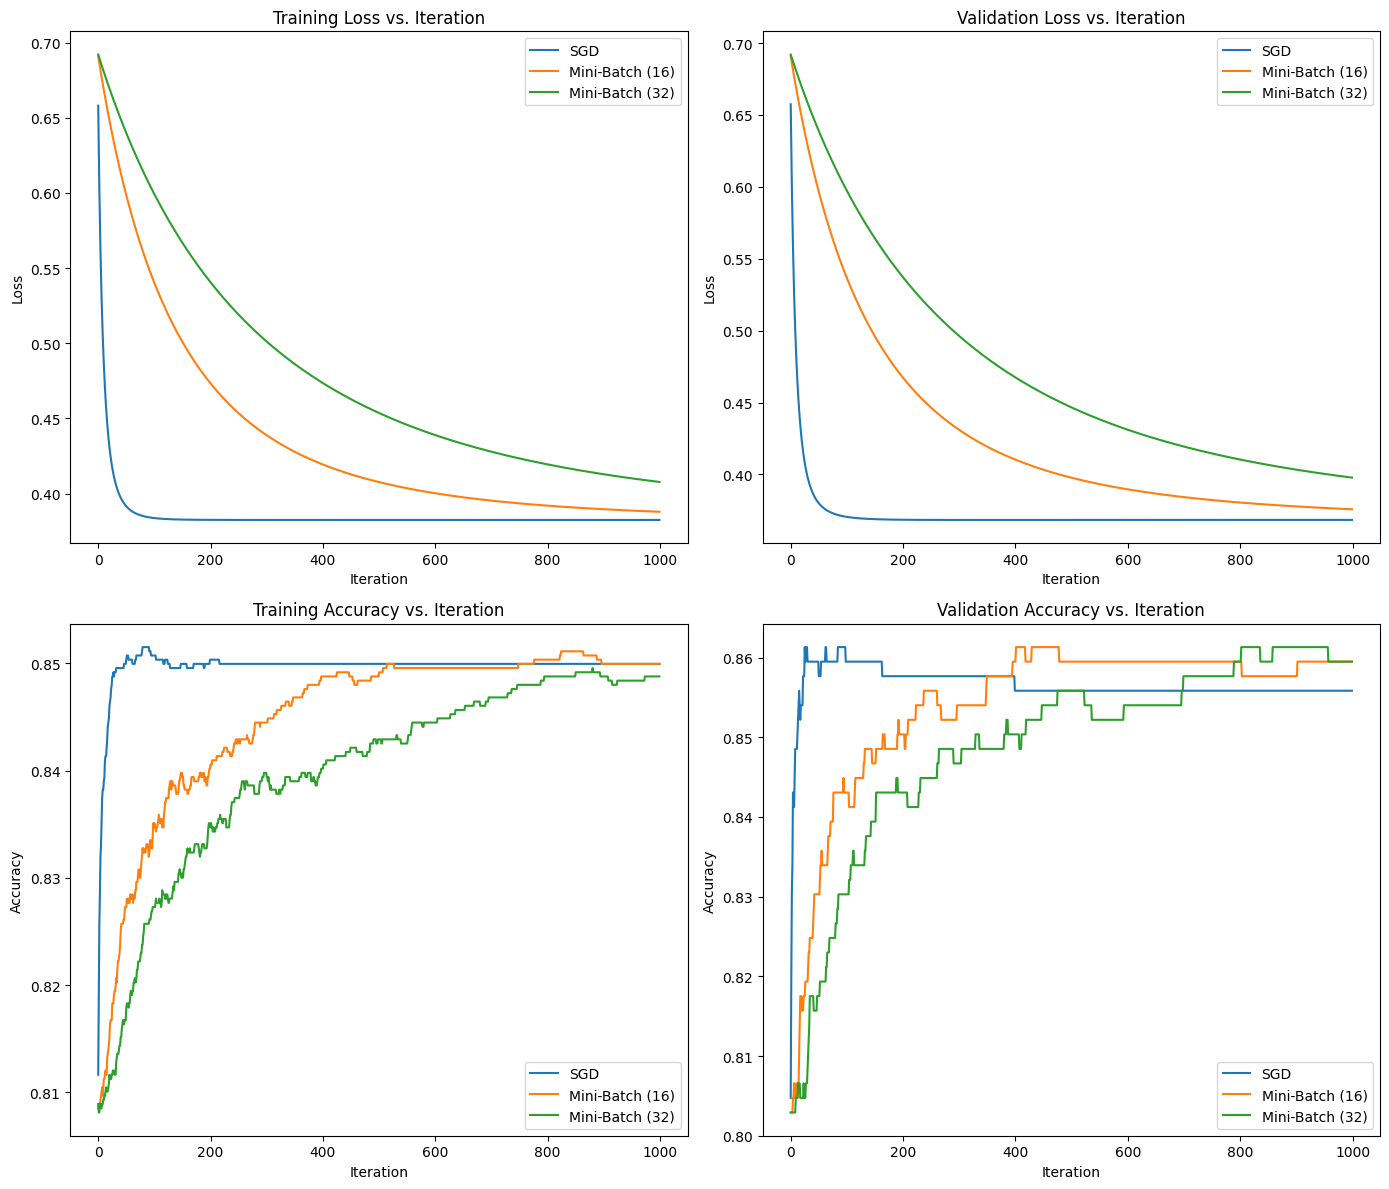

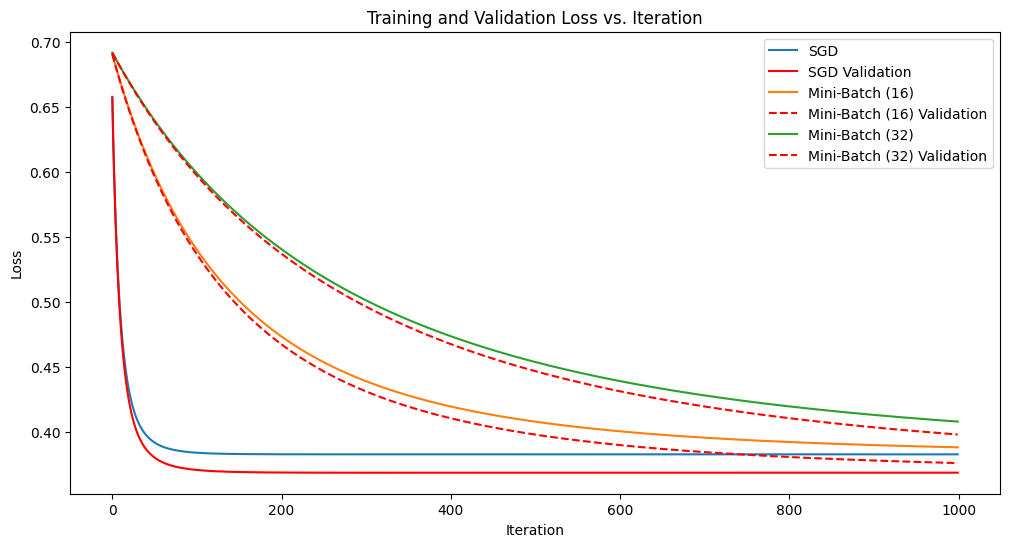

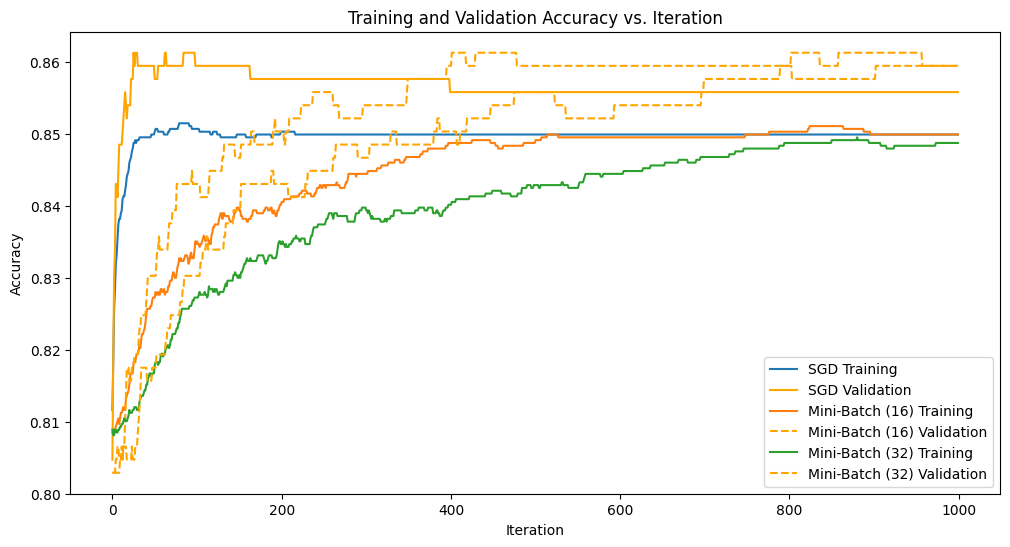

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Mean and standard deviation for scaling
means = np.mean(X_data, axis=0)
stds = np.std(X_data, axis=0)

# Standardize features
X_data_scaled = (X_data - means) / stds

# Split data into training, validation, and test sets
np.random.seed(42)
indices = np.arange(X_data_scaled.shape[0])
np.random.shuffle(indices)

split_train = int(0.7 * X_data_scaled.shape[0])
split_val = int(0.15 * X_data_scaled.shape[0]) + split_train

train_indices = indices[:split_train]
val_indices = indices[split_train:split_val]
test_indices = indices[split_val:]

X_train = X_data_scaled[train_indices]
y_train = y_data[train_indices]
X_val = X_data_scaled[val_indices]
y_val = y_data[val_indices]
X_test = X_data_scaled[test_indices]
y_test = y_data[test_indices]

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000, batch_size=None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.batch_size = batch_size

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, X_val, y_val):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        self.train_accuracies = []
        self.val_accuracies = []
        self.val_losses = []

        for i in range(self.num_iterations):
            if self.batch_size:
                # Mini-Batch Gradient Descent
                indices = np.random.permutation(m)
                for start_idx in range(0, m, self.batch_size):
                    end_idx = min(start_idx + self.batch_size, m)
                    batch_indices = indices[start_idx:end_idx]
                    X_batch = X[batch_indices]
                    y_batch = y[batch_indices]

                    model = np.dot(X_batch, self.weights) + self.bias
                    predictions = self.sigmoid(model)

                    dw = (1 / len(y_batch)) * np.dot(X_batch.T, (predictions - y_batch))
                    db = (1 / len(y_batch)) * np.sum(predictions - y_batch)

                    self.weights -= self.learning_rate * dw
                    self.bias -= self.learning_rate * db

            else:
                # Stochastic Gradient Descent
                for idx in range(m):
                    X_i = X[idx:idx+1]
                    y_i = y[idx:idx+1]

                    model = np.dot(X_i, self.weights) + self.bias
                    predictions = self.sigmoid(model)

                    dw = (1 / len(y_i)) * np.dot(X_i.T, (predictions - y_i))
                    db = (1 / len(y_i)) * np.sum(predictions - y_i)

                    self.weights -= self.learning_rate * dw
                    self.bias -= self.learning_rate * db

            # Calculate loss and accuracy
            loss = -np.mean(y * np.log(self.sigmoid(np.dot(X, self.weights) + self.bias) + 1e-10) + (1 - y) * np.log(1 - self.sigmoid(np.dot(X, self.weights) + self.bias) + 1e-10))
            self.losses.append(loss)

            train_predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
            train_accuracy = np.mean(np.round(train_predictions) == y)
            self.train_accuracies.append(train_accuracy)

            val_predictions = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
            val_loss = -np.mean(y_val * np.log(val_predictions + 1e-10) + (1 - y_val) * np.log(1 - val_predictions + 1e-10))
            val_accuracy = np.mean(np.round(val_predictions) == y_val)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_accuracy)

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

# Define and train models with different optimization strategies
batch_sizes = [16, 32]  # Mini-batch sizes
sgd_model = LogisticRegression(learning_rate=0.0001, num_iterations=1000)
sgd_model.fit(X_train, y_train, X_val, y_val)

# Train with mini-batch gradient descent
mini_batch_models = []
for batch_size in batch_sizes:
    model = LogisticRegression(learning_rate=0.0001, num_iterations=1000, batch_size=batch_size)
    model.fit(X_train, y_train, X_val, y_val)
    mini_batch_models.append((batch_size, model))

# Plotting the results
plt.figure(figsize=(14, 12))

# Plot Training Loss vs. Iteration
plt.subplot(2, 2, 1)
plt.plot(sgd_model.losses, label='SGD')
for batch_size, model in mini_batch_models:
    plt.plot(model.losses, label=f'Mini-Batch ({batch_size})')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss vs. Iteration')
plt.legend()

# Plot Validation Loss vs. Iteration
plt.subplot(2, 2, 2)
plt.plot(sgd_model.val_losses, label='SGD')
for batch_size, model in mini_batch_models:
    plt.plot(model.val_losses, label=f'Mini-Batch ({batch_size})')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Iteration')
plt.legend()

# Plot Training Accuracy vs. Iteration
plt.subplot(2, 2, 3)
plt.plot(sgd_model.train_accuracies, label='SGD')
for batch_size, model in mini_batch_models:
    plt.plot(model.train_accuracies, label=f'Mini-Batch ({batch_size})')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Iteration')
plt.legend()

# Plot Validation Accuracy vs. Iteration
plt.subplot(2, 2, 4)
plt.plot(sgd_model.val_accuracies, label='SGD')
for batch_size, model in mini_batch_models:
    plt.plot(model.val_accuracies, label=f'Mini-Batch ({batch_size})')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Training Loss and Validation Loss vs. Iteration
plt.figure(figsize=(12, 6))
plt.plot(sgd_model.losses, label='SGD')
plt.plot(sgd_model.val_losses, label='SGD Validation', color='red')
for batch_size, model in mini_batch_models:
    plt.plot(model.losses, label=f'Mini-Batch ({batch_size})')
    plt.plot(model.val_losses, label=f'Mini-Batch ({batch_size}) Validation', color='red', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Iteration')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy vs. Iteration
plt.figure(figsize=(12, 6))
plt.plot(sgd_model.train_accuracies, label='SGD Training')
plt.plot(sgd_model.val_accuracies, label='SGD Validation', color='orange')
for batch_size, model in mini_batch_models:
    plt.plot(model.train_accuracies, label=f'Mini-Batch ({batch_size}) Training')
    plt.plot(model.val_accuracies, label=f'Mini-Batch ({batch_size}) Validation', color='orange', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Iteration')
plt.legend()
plt.show()


1. Stochastic Gradient Descent (SGD):
Convergence Speed:

Faster Convergence: SGD updates the model weights using only one training example at a time. This can lead to faster convergence because each update is performed more frequently compared to batch or mini-batch updates.
High Variance: The high variance in the gradient estimate can lead to faster progress initially, but it may take more iterations to converge to a precise minimum.
Stability:

Less Stable: Due to the high variance in gradient estimates, the loss curve for SGD may exhibit significant fluctuations. This can result in a less smooth convergence path and difficulty in finding a precise minimum.
Learning Rate Sensitivity: SGD often requires careful tuning of the learning rate. Too high a learning rate can cause the optimization process to oscillate, while too low a learning rate can result in slow convergence.
Advantages:

Faster Updates: More frequent updates can be beneficial in terms of processing time, especially for large datasets.
Escape Local Minima: The noise introduced by SGD can help the model escape local minima, potentially finding a better global solution.
Disadvantages:

Oscillations: Due to noisy updates, the loss curve may show oscillations, making it harder to track convergence.
2. Mini-Batch Gradient Descent:
Convergence Speed:

Moderate Convergence: Mini-Batch Gradient Descent updates the weights using a subset of the training data (mini-batch). This method balances the speed of SGD with the stability of Batch Gradient Descent.
Efficient Training: By using mini-batches, it can take advantage of vectorized operations and parallel computation, leading to faster training compared to full-batch gradient descent.
Stability:

More Stable: Mini-Batch Gradient Descent provides a compromise between the noisy updates of SGD and the stable, but slower updates of Batch Gradient Descent. It generally results in smoother convergence curves compared to SGD.
Batch Size Impact: The size of the mini-batch affects stability and convergence speed. Smaller batches provide noisier updates but can escape local minima, while larger batches lead to more stable updates but may converge more slowly.
Advantages:

Balanced Convergence: Offers a good balance between convergence speed and stability, especially when tuning the batch size appropriately.
Efficient Computation: Takes advantage of modern computational hardware, such as GPUs, more effectively than SGD or Batch Gradient Descent.
Disadvantages:

Batch Size Tuning: Requires tuning of the batch size. Too small a batch can introduce high variance in updates, while too large a batch can slow down convergence and lead to excessive computational costs.

### PART  E

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Define independent variables (features) and dependent variable (target)
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Mean and standard deviation for scaling
means = np.mean(X_data, axis=0)
stds = np.std(X_data, axis=0)

# Standardize features
X_data_scaled = (X_data - means) / stds

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []

        for i in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate loss
            loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
            self.losses.append(loss)
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp, fn, fp, tn = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score =  2*(precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return accuracy, precision, recall, f1_score

def manual_k_fold_cross_validation(X, y, k=5):
    # Shuffle the data indices
    np.random.seed(42)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Split the indices into k folds
    fold_size = len(X) // k
    folds = [indices[i*fold_size:(i+1)*fold_size] for i in range(k)]
    
    # If there are leftover data points, distribute them among the folds
    leftover = indices[k*fold_size:]
    for i in range(len(leftover)):
        folds[i] = np.concatenate((folds[i], [leftover[i]]))
    
    accuracies, precisions, recalls, f1_scores = [], [], [], []
    
    for i in range(k):
        # Create training and testing sets
        test_indices = folds[i]
        train_indices = np.concatenate([folds[j] for j in range(k) if j != i])
        
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        # Train the model
        model = LogisticRegression(learning_rate=0.001, num_iterations=10000)
        model.fit(X_train, y_train)
        
        # Test the model
        y_pred = model.predict(X_test)
        
        # Get performance metrics
        acc, prec, rec, f1 = classification_report(y_test, y_pred)
        accuracies.append(acc)
        precisions.append(prec)
        recalls.append(rec)
        f1_scores.append(f1)
    
    return {
        'accuracy_mean': np.mean(accuracies),
        'accuracy_std': np.std(accuracies),
        'precision_mean': np.mean(precisions),
        'precision_std': np.std(precisions),
        'recall_mean': np.mean(recalls),
        'recall_std': np.std(recalls),
        'f1_score_mean': np.mean(f1_scores),
        'f1_score_std': np.std(f1_scores)
    }

# Perform manual k-fold cross-validation
cv_results = manual_k_fold_cross_validation(X_data_scaled, y_data, k=5)

# Print the results
print(f"Average Accuracy: {cv_results['accuracy_mean']:.4f} ± {cv_results['accuracy_std']:.4f}")
print(f"Average Precision: {cv_results['precision_mean']:.4f} ± {cv_results['precision_std']:.4f}")
print(f"Average Recall: {cv_results['recall_mean']:.4f} ± {cv_results['recall_std']:.4f}")
print(f"Average F1 Score: {cv_results['f1_score_mean']:.4f} ± {cv_results['f1_score_std']:.4f}")


Average Accuracy: 0.8501 ± 0.0089
Average Precision: 0.8544 ± 0.0091
Average Recall: 0.9923 ± 0.0028
Average F1 Score: 0.9182 ± 0.0052


Stability and Variance of Model’s Performance Across Different Folds
1. Accuracy:

Average Accuracy: 0.8501
Standard Deviation: ± 0.0089
The average accuracy of 85.01% indicates that the model performs quite well across the different folds. The standard deviation of ±0.0089 suggests that there is relatively low variability in the accuracy across folds. This low standard deviation implies that the model's performance is stable and consistent, with minimal fluctuations in accuracy when trained on different subsets of the data.

2. Precision:

Average Precision: 0.8544
Standard Deviation: ± 0.0091
 The average precision of 85.44% indicates that the model has a good ability to correctly identify positive cases among the instances it classifies as positive. The standard deviation of ±0.0091 is small, which shows that the precision of the model is stable across different folds. This stability in precision suggests that the model is reliably identifying positive cases consistently across different subsets of the data.

3. Recall:

Average Recall: 0.9923
Standard Deviation: ± 0.0028
The average recall of 99.23% is exceptionally high, indicating that the model is very effective at identifying positive cases. The very low standard deviation of ±0.0028 signifies that the model’s recall is highly consistent across different folds. This indicates that the model's ability to detect positive cases does not vary significantly between different subsets of the data, showing that it performs reliably in this aspect.

4. F1 Score:

Average F1 Score: 0.9182
Standard Deviation: ± 0.0052
The average F1 score of 91.82% reflects a strong balance between precision and recall. The standard deviation of ±0.0052 is relatively small, which indicates that the model's F1 score is quite consistent across the different folds. This suggests that the trade-off between precision and recall is stable and that the model maintains a good balance of these metrics across various subsets of the data.

### PART F

Stopping early at iteration 6252
Stopping early at iteration 6252
Stopping early at iteration 6252


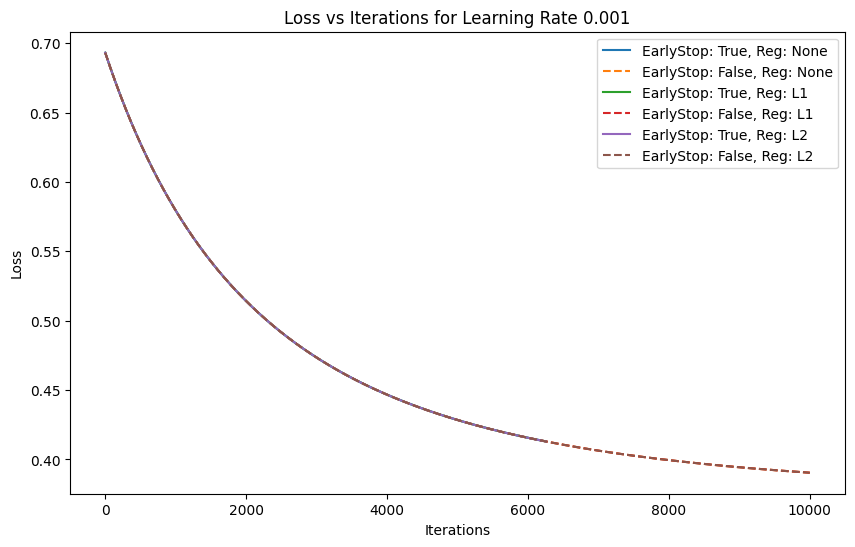

Stopping early at iteration 1573
Stopping early at iteration 1573
Stopping early at iteration 1573


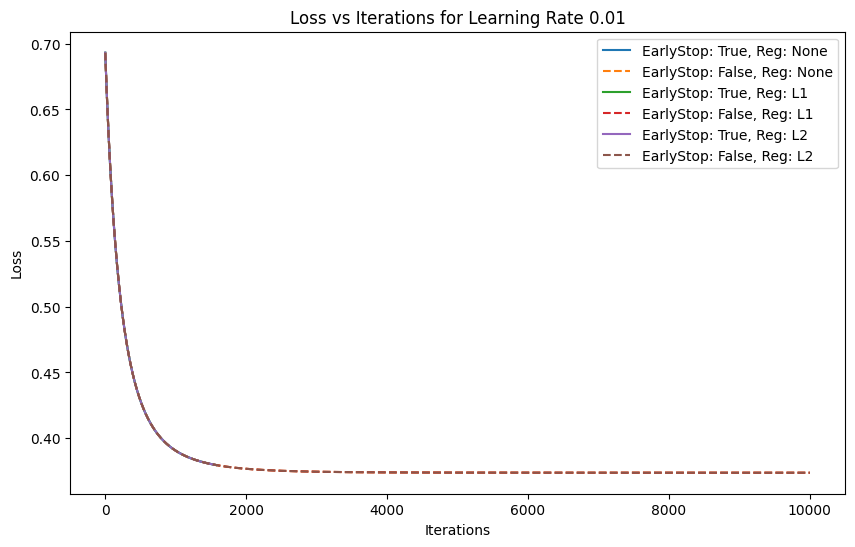

Stopping early at iteration 301
Stopping early at iteration 301
Stopping early at iteration 301


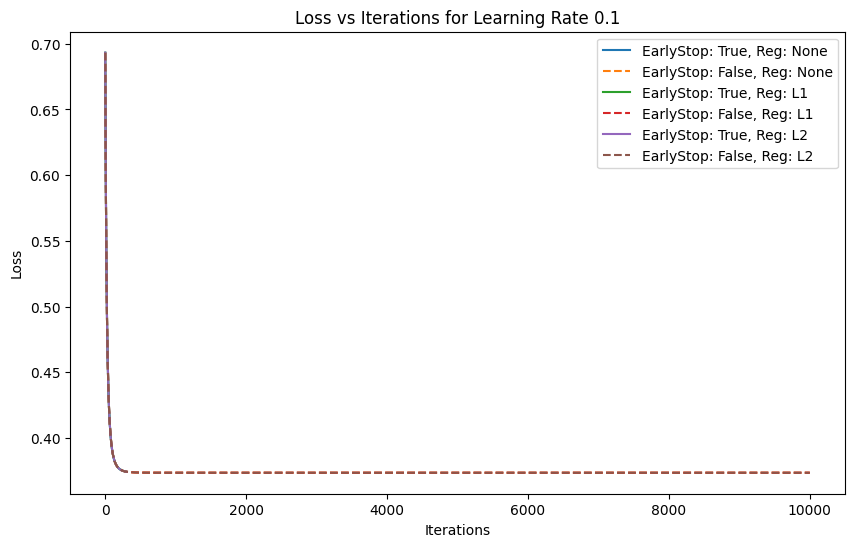

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('Heart Disease.csv')

# Drop rows with missing values
data = data.dropna()

# Split features and target
X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

# Standardize features
means = np.mean(X_data, axis=0)
stds = np.std(X_data, axis=0)
X_data_scaled = (X_data - means) / stds

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000, tolerance=1e-4, patience=10, regularization=None, reg_lambda=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.tolerance = tolerance  # Early stopping tolerance
        self.patience = patience  # Number of iterations to wait before stopping
        self.regularization = regularization  # 'L1', 'L2' or None
        self.reg_lambda = reg_lambda  # Regularization strength
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        best_loss = np.inf
        patience_counter = 0
        
        for i in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            
            # Apply regularization
            if self.regularization == 'L2':
                dw += (self.reg_lambda / m) * self.weights
            elif self.regularization == 'L1':
                dw += (self.reg_lambda / m) * np.sign(self.weights)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate loss with regularization
            loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
            if self.regularization == 'L2':
                loss += (self.reg_lambda / (2 * m)) * np.sum(self.weights ** 2)
            elif self.regularization == 'L1':
                loss += (self.reg_lambda / m) * np.sum(np.abs(self.weights))

            self.losses.append(loss)
            
            # Early stopping
            if loss < best_loss - self.tolerance:
                best_loss = loss
                patience_counter = 0  # Reset patience
            else:
                patience_counter += 1
            
            if patience_counter >= self.patience:
                print(f"Stopping early at iteration {i}")
                break
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.round(predictions)

# Function for accuracy calculation
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Split data into train/test
train_size = int(0.8 * len(X_data_scaled))
X_train, X_test = X_data_scaled[:train_size], X_data_scaled[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Train and compare models with and without early stopping
def run_experiment(early_stopping=True, learning_rate=0.001, regularization=None, reg_lambda=0.01):
    model = LogisticRegression(learning_rate=learning_rate, num_iterations=10000, tolerance=1e-4, patience=10 if early_stopping else np.inf, regularization=regularization, reg_lambda=reg_lambda)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Accuracy
    train_acc = accuracy(y_train, y_pred_train)
    test_acc = accuracy(y_test, y_pred_test)
    
    # Return loss curve for plotting
    return model.losses, train_acc, test_acc

# Learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1]

# Regularization settings
regularization_methods = [None, 'L1', 'L2']
# Colors and line styles for each combination
colors = ['blue', 'green', 'red']
line_styles = {'EarlyStop': '-', 'NoEarlyStop': '--'}

# Plot loss curves for each learning rate
for lr in learning_rates:
    plt.figure(figsize=(10, 6))
    plt.title(f"Loss vs Iterations for Learning Rate {lr}")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    
    for reg in regularization_methods:
        # Early stopping
        losses_with_es, train_acc_es, test_acc_es = run_experiment(early_stopping=True, learning_rate=lr, regularization=reg, reg_lambda=0.01)
        plt.plot(losses_with_es, label=f"EarlyStop: True, Reg: {reg}")
        
        # Without early stopping
        losses_no_es, train_acc_no_es, test_acc_no_es = run_experiment(early_stopping=False, learning_rate=lr, regularization=reg, reg_lambda=0.01)
        plt.plot(losses_no_es, linestyle='--', label=f"EarlyStop: False, Reg: {reg}")
    
    plt.legend()
    plt.show()



Stopping early at iteration 6252
Stopping early at iteration 6252
Stopping early at iteration 6252
Stopping early at iteration 1573
Stopping early at iteration 1573
Stopping early at iteration 1573
Stopping early at iteration 301
Stopping early at iteration 301
Stopping early at iteration 301


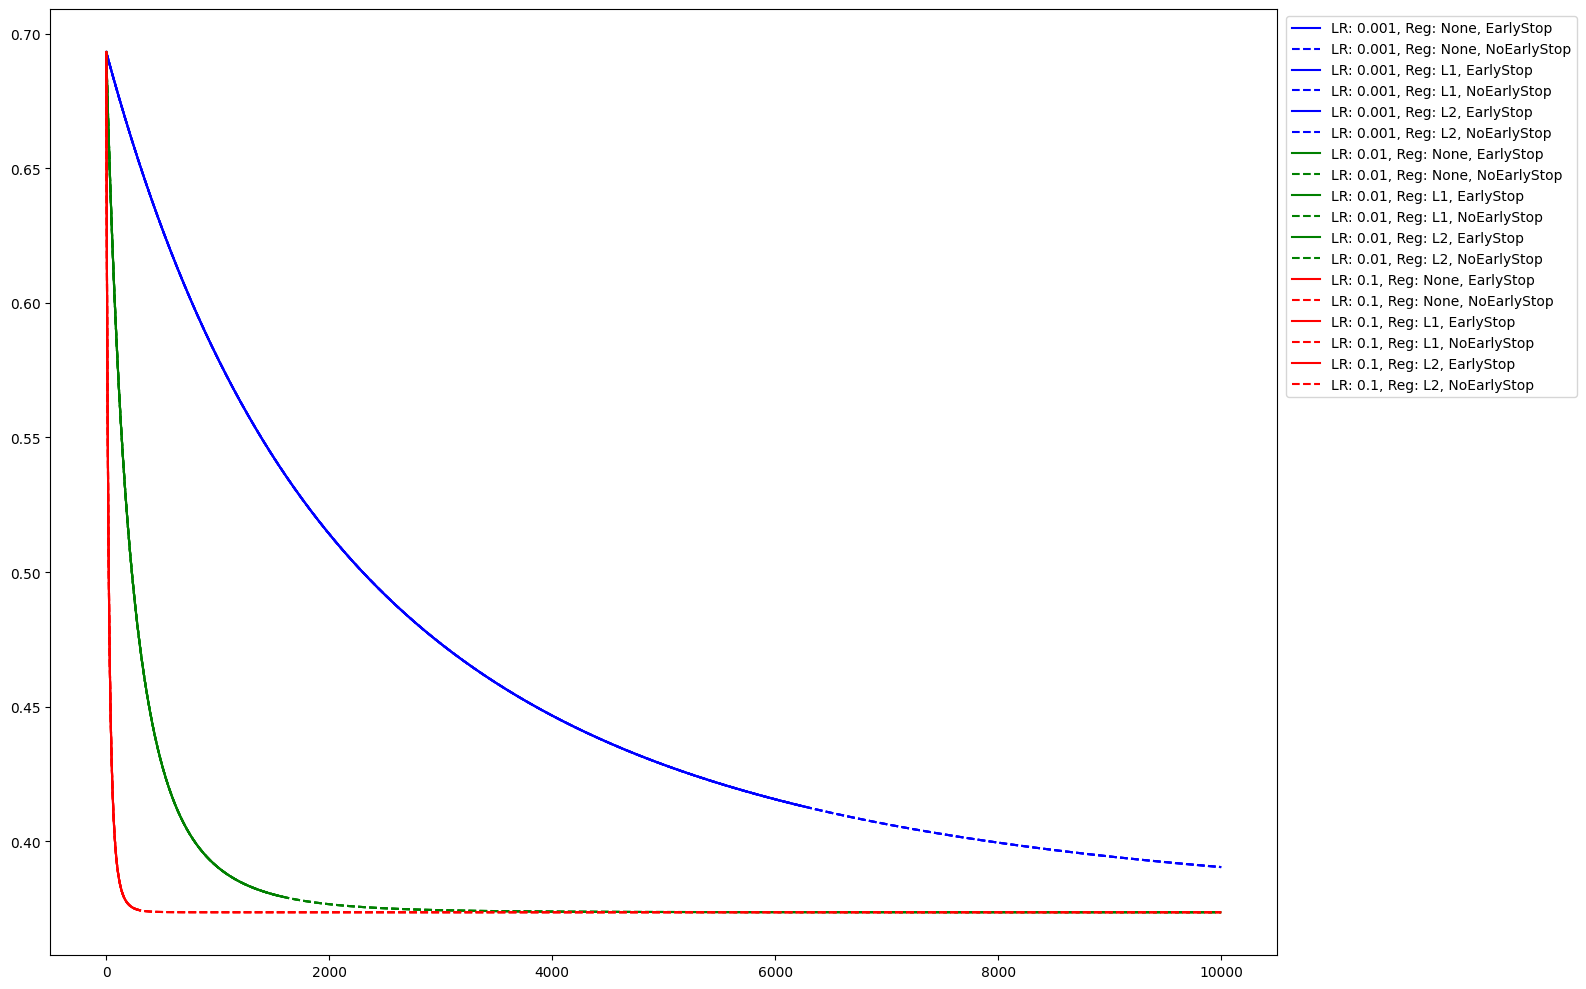

In [110]:
plt.figure(figsize=(16, 10))
for idx, lr in enumerate(learning_rates):
    for reg in regularization_methods:
        label_es = f"LR: {lr}, Reg: {reg}, EarlyStop"
        label_no_es = f"LR: {lr}, Reg: {reg}, NoEarlyStop"
        
        # Early stopping
        losses_with_es, _, _ = run_experiment(early_stopping=True, learning_rate=lr, regularization=reg, reg_lambda=0.01)
        plt.plot(losses_with_es, label=label_es, color=colors[idx], linestyle=line_styles['EarlyStop'])
        
        # Without early stopping
        losses_no_es, _, _ = run_experiment(early_stopping=False, learning_rate=lr, regularization=reg, reg_lambda=0.01)
        plt.plot(losses_no_es, label=label_no_es, color=colors[idx], linestyle=line_styles['NoEarlyStop'])

plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

Effect on Overfitting:

Without Early Stopping:
Models trained without early stopping often continue to improve on the training set while their performance on the validation set might start to deteriorate. This is indicative of overfitting, where the model learns the training data too well, including noise and outliers, which negatively impacts its performance on unseen data.
With Early Stopping:
Iteration 6252(lr =0.001): The model stopped early at this point, which suggests that it likely balanced the training loss and validation loss effectively. It was able to halt training before the model began to overfit, capturing a good representation of the underlying patterns in the data.
Iteration 1573(lr =0.01): Early stopping at this iteration implies that the model might have reached a point where further training would lead to diminishing returns or overfitting, but this point might have been earlier than the optimal stopping point for more complex learning rates or regularization settings.
Iteration 301(lr =0.1): A very early stopping point indicates that the model might have stopped training before it could effectively learn the underlying patterns, possibly resulting in underfitting, especially if this stopping point was reached with aggressive regularization or a high learning rate.
3. Effect on Generalization:

With Early Stopping:

Improved Generalization: Models that stop training early often exhibit better generalization to unseen data compared to those trained until full convergence. This is because early stopping prevents the model from learning the noise in the training data and instead focuses on capturing the true signal.
Balanced Performance: By stopping early, the model is less likely to memorize the training data, resulting in more balanced performance metrics (e.g., accuracy, precision, recall) across training and validation sets.
Comparison to Models Without Early Stopping:

Training vs. Validation Performance: Models that utilized early stopping generally show more consistent validation performance as compared to those trained without it. The training loss might be lower, but this is offset by the potential for worse generalization if overfitting occurs.
Effect of Learning Rate and Regularization: Different learning rates and regularization techniques impact the point at which early stopping occurs. A higher learning rate might lead to early convergence but less stable models, while different regularization strengths (L1 and L2) affect the model’s ability to generalize by controlling complexity and encouraging sparsity or weight decay.

### QUESTION 3 Section C (Algorithm implementation using packages)
Split the given dataset into 80:20 (train: test) and perform the following tasks:
Dataset: Electricity Bill Dataset